## Загрузить файл hr.csv

In [41]:
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
from scipy import stats

def test1(row):
    return round((row['number_of_employees'] / df_spz['number_of_employees'].sum()) * 100,2)

df = pd.read_csv('HR.csv')
df.head(15)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [43]:
print(df['salary'].unique())
df['salary'].replace("low",value=1, inplace=True)
df['salary'].replace("medium",value=2, inplace=True)
df['salary'].replace("high",value=3, inplace=True)
df

['low' 'medium' 'high']


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1
14995,0.37,0.48,2,160,3,0,1,0,support,1
14996,0.37,0.53,2,143,3,0,1,0,support,1
14997,0.11,0.96,6,280,4,0,1,0,support,1


In [44]:
print(df['sales'].unique())
print('Для упрощения можно сгруппировать отделы. Например, IT и technical. НО это не лучший подход, т.к. сильные и слабые стороны каждого отдела могет быть замаскированы аналогичными характеристиками другого отдела или группы в целом. Поэтому будем рассматирвать каждый отдел самостоятельно, но переведем значения в категориальную переменну.ю цифрового типа.')
df['sales'].replace("sales",value=1, inplace=True)
df['sales'].replace("technical",value=2, inplace=True)
df['sales'].replace("support",value=3, inplace=True)
df['sales'].replace("IT",value=4, inplace=True)
df['sales'].replace("product_mng",value=5, inplace=True)
df['sales'].replace("marketing",value=6, inplace=True)
df['sales'].replace("RandD",value=7, inplace=True)
df['sales'].replace("accounting",value=8, inplace=True)
df['sales'].replace("hr",value=9, inplace=True)
df['sales'].replace("management",value=10, inplace=True)
df

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Для упрощения можно сгруппировать отделы. Например, IT и technical. НО это не лучший подход, т.к. сильные и слабые стороны каждого отдела могет быть замаскированы аналогичными характеристиками другого отдела или группы в целом. Поэтому будем рассматирвать каждый отдел самостоятельно, но переведем значения в категориальную переменну.ю цифрового типа.


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,1,1
1,0.80,0.86,5,262,6,0,1,0,1,2
2,0.11,0.88,7,272,4,0,1,0,1,2
3,0.72,0.87,5,223,5,0,1,0,1,1
4,0.37,0.52,2,159,3,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,3,1
14995,0.37,0.48,2,160,3,0,1,0,3,1
14996,0.37,0.53,2,143,3,0,1,0,3,1
14997,0.11,0.96,6,280,4,0,1,0,3,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null int64
salary                   14999 non-null int64
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [46]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,3.695513,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.754845,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,3.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,6.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,10.000000,3.000000


Вывод по текущему разделу:
- Данные достаточно качественные. Как минимум в них отсутсвуют пропуски и явных ошибок также не видно.
- Категориальные переменные для describe рассматирвать смысла нет.
- Данные mean очень близки к 50%, что является одним из признаков "нормальности" данных.
- Есть достаточно большой разброс по столбцу average_montly_hours. Причем это относится не только к максимальным и минимальным значениям, но и к данным на отметке 25% и 75%, у которых разница составляет 89 часов.

## Рассчитать и визуализировать корреляционную матрицу для переменных

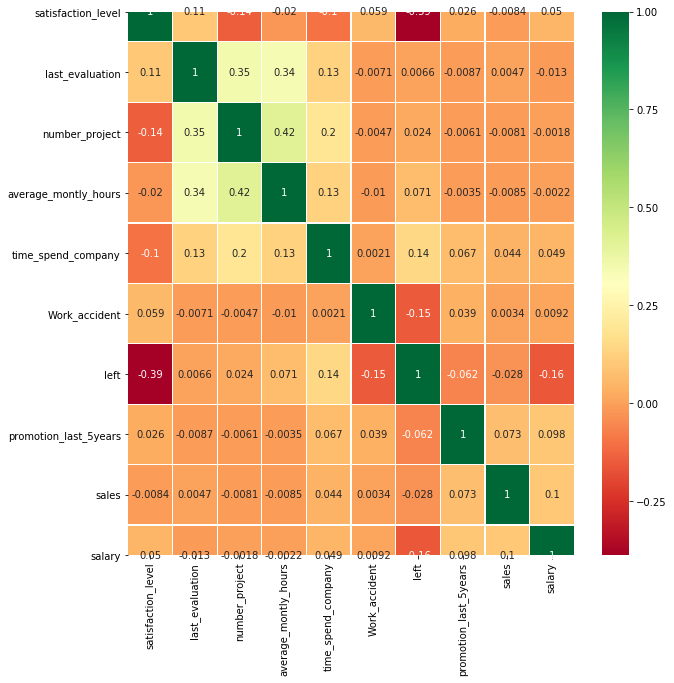

In [47]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Выводы по корреляционной матрице:
- Вся матирца характеризуется слабой корреляцией между переменными.
- Изучаемый показатель (left) имеет слабую связь с другими переменными. Самая сильная связь с satisfaction_level.
- Линейные модели использовать бессмысленно, поскольку линейной связи нет.

Для сравнения построим корреляционную матрицу чисто для уволенных сотрудников.

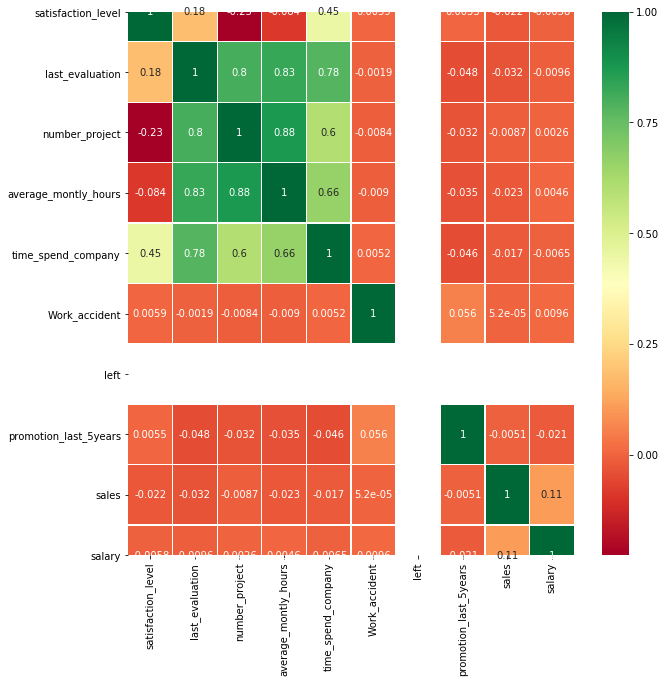

In [48]:
df_left_yes = df[df['left'] == 1]
sns.heatmap(df_left_yes.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Воспользуемся собственными функциями пандас для определения корреляции между переменными.

In [49]:
df.corr(method='pearson')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,-0.008430,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.004741,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.008138,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.008511,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.043883,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.003402,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.028394,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.072657,0.098119
sales,-0.008430,0.004741,-0.008138,-0.008511,0.043883,0.003402,-0.028394,0.072657,1.000000,0.102711
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,0.102711,1.000000


In [50]:
df.corr(method='kendall')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.113865,0.022077,0.051126,-0.110005,0.046298,-0.300675,0.018332,-0.006389,0.036069
last_evaluation,0.113865,1.000000,0.266267,0.235374,0.118842,-0.004749,-0.002010,-0.005903,0.006988,-0.007294
number_project,0.022077,0.266267,1.000000,0.306987,0.195025,0.002096,-0.017601,-0.002666,-0.003303,0.003855
average_montly_hours,0.051126,0.235374,0.306987,1.000000,0.119466,-0.004966,0.038045,-0.002417,-0.005455,0.001896
time_spend_company,-0.110005,0.118842,0.195025,0.119466,1.000000,-0.024839,0.244851,0.032059,0.009852,0.001250
Work_accident,0.046298,-0.004749,0.002096,-0.004966,-0.024839,1.000000,-0.154622,0.039245,0.004513,0.008234
left,-0.300675,-0.002010,-0.017601,0.038045,0.244851,-0.154622,1.000000,-0.061788,-0.023117,-0.147580
promotion_last_5years,0.018332,-0.005903,-0.002666,-0.002417,0.032059,0.039245,-0.061788,1.000000,0.038225,0.091372
sales,-0.006389,0.006988,-0.003303,-0.005455,0.009852,0.004513,-0.023117,0.038225,1.000000,0.061923
salary,0.036069,-0.007294,0.003855,0.001896,0.001250,0.008234,-0.147580,0.091372,0.061923,1.000000


In [51]:
df.corr(method='spearman')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428,0.056333,-0.365842,0.022306,-0.008839,0.045381
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154,-0.005767,-0.002440,-0.007167,0.009806,-0.009117
number_project,0.005786,0.350399,1.000000,0.397855,0.251971,0.002328,-0.019544,-0.002960,-0.004153,0.004453
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750,-0.006063,0.046455,-0.002951,-0.007617,0.002452
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000,-0.027277,0.268876,0.035205,0.012434,0.001274
Work_accident,0.056333,-0.005767,0.002328,-0.006063,-0.027277,1.000000,-0.154622,0.039245,0.005166,0.008496
left,-0.365842,-0.002440,-0.019544,0.046455,0.268876,-0.154622,1.000000,-0.061788,-0.026459,-0.152266
promotion_last_5years,0.022306,-0.007167,-0.002960,-0.002951,0.035205,0.039245,-0.061788,1.000000,0.043752,0.094273
sales,-0.008839,0.009806,-0.004153,-0.007617,0.012434,0.005166,-0.026459,0.043752,1.000000,0.072923
salary,0.045381,-0.009117,0.004453,0.002452,0.001274,0.008496,-0.152266,0.094273,0.072923,1.000000


In [52]:
print('pearson - Наибольшее виляние на исследуемый столбец оказывают: satisfaction_level, salary, Work_accident, time_spend_company')
print('kendall - Наибольшее виляние на исследуемый столбец оказывают: satisfaction_level, time_spend_company, Work_accident, salary')
print('spearman - Наибольшее виляние на исследуемый столбец оказывают: satisfaction_level, time_spend_company, Work_accident, salary')
print('Все 3 метода выделили 4 одинаковых столбца, которые по их представлению оказывают наибольшее влияние на уволнение сотрудников. Тем не менее говорить о высокой корреляции признаков не приходится.')

pearson - Наибольшее виляние на исследуемый столбец оказывают: satisfaction_level, salary, Work_accident, time_spend_company
kendall - Наибольшее виляние на исследуемый столбец оказывают: satisfaction_level, time_spend_company, Work_accident, salary
spearman - Наибольшее виляние на исследуемый столбец оказывают: satisfaction_level, time_spend_company, Work_accident, salary
Все 3 метода выделили 4 одинаковых столбца, которые по их представлению оказывают наибольшее влияние на уволнение сотрудников. Тем не менее говорить о высокой корреляции признаков не приходится.


## Визуализировать несколько взаимосвязей между переменными

Будем исследовать взаимосвязи всех переменных со столбцом LEFT. Проблемные столбцы:
- satisfaction_level
- last_evaluation
- average_montly_hours

Проблема в том, что разброс данных в этих столбцах очень большой. Визуализировать эти наборы для попарного изучения бессмысленно - мы там ничего не увидим. Поэтому проведем группировку параметров в этих столбцах, с созданием новых (слежубных) столбцов.

In [56]:
df['satisfaction_level_1'] = df['satisfaction_level'] * 100
df['satisfaction_level_group'] = df['satisfaction_level_1'].map(lambda ttyy: int(ttyy // 10))
df['last_evaluation_1'] = df['last_evaluation'] * 100
df['last_evaluation_group'] = df['last_evaluation_1'].map(lambda ttyy: int(ttyy // 10))
df['average_montly_hours_group'] = df['average_montly_hours'].map(lambda ttyy: int(ttyy // 25))
del df['satisfaction_level_1']
del df['last_evaluation_1']
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,satisfaction_level_group,last_evaluation_group,average_montly_hours_group
0,0.38,0.53,2,157,3,0,1,0,1,1,3,5,6
1,0.80,0.86,5,262,6,0,1,0,1,2,8,8,10
2,0.11,0.88,7,272,4,0,1,0,1,2,1,8,10
3,0.72,0.87,5,223,5,0,1,0,1,1,7,8,8
4,0.37,0.52,2,159,3,0,1,0,1,1,3,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,3,1,4,5,6
14995,0.37,0.48,2,160,3,0,1,0,3,1,3,4,6
14996,0.37,0.53,2,143,3,0,1,0,3,1,3,5,5
14997,0.11,0.96,6,280,4,0,1,0,3,1,1,9,11


# satisfaction_level_group и left

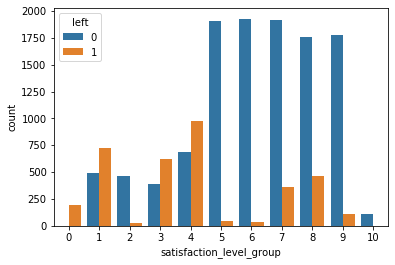

In [57]:
sns.countplot(x='satisfaction_level_group', hue='left', data=df)

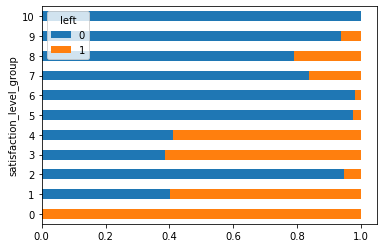

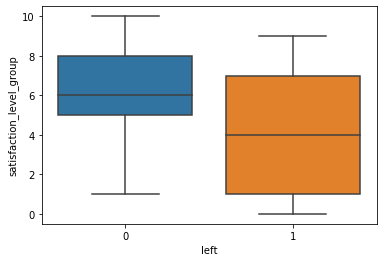

In [58]:
ddff11 = df.groupby(['satisfaction_level_group','left'])
ddff11 = ddff11.size().unstack().fillna(0)
ddff11[2] = ddff11[0] + ddff11[1]
ddff11[3] = ddff11[0] / ddff11[2]
ddff11[4] = ddff11[1] / ddff11[2]
ddff11[0] = ddff11[3]
ddff11[1] = ddff11[4]
del ddff11[4]
del ddff11[3]
del ddff11[2]
df_sel_satisfaction_level_group = ddff11.reset_index()
ddff11.plot(kind='barh', stacked=True)
plt.show()
sns.boxplot(x='left', y='satisfaction_level_group', data=df)
plt.show()

In [59]:
df['satisfaction_level_group'].value_counts()

7     2279
8     2220
6     1960
5     1953
9     1893
4     1668
1     1214
3     1013
2      493
0      195
10     111
Name: satisfaction_level_group, dtype: int64

Выводы:
- В определенных группах satisfaction_level_group ест проблемы с увольнениями.
- Данные распределны примерно нормаьлно и говорить о неважности показателей отдельных групп из-за недостаточности объектов в выборке - нельзя.
- Среднее значение работающих значительно выше аналогичного показателя уволеных.
- У уволенных сотрудников очень широкое тело в боксплоте.

# last_evaluation_group и left

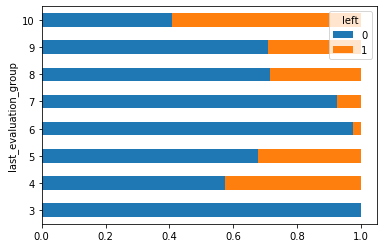

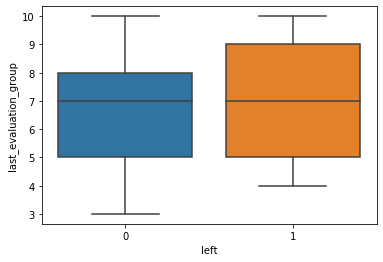

In [60]:
ddff11 = df.groupby(['last_evaluation_group','left'])
ddff11 = ddff11.size().unstack().fillna(0)
ddff11[2] = ddff11[0] + ddff11[1]
ddff11[3] = ddff11[0] / ddff11[2]
ddff11[4] = ddff11[1] / ddff11[2]
ddff11[0] = ddff11[3]
ddff11[1] = ddff11[4]
del ddff11[4]
del ddff11[3]
del ddff11[2]
df_sel_satisfaction_level_group = ddff11.reset_index()
ddff11.plot(kind='barh', stacked=True)
plt.show()
sns.boxplot(x='left', y='last_evaluation_group', data=df)
plt.show()

Выводы:
- выборки достаточно похожи (особенно по средним значениям)
- есть группы (например, 10, 4, 5, 8 и 9) где есть проблема с увольнениями. Причину нужно исследовать дополнительно.
- Боксплоты очень похожи, но есть и важные различия (верхняя часть тела у уволенных значительно выше, а усы у уволенных значительно короче.

## number_project и left

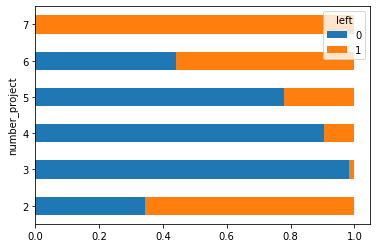

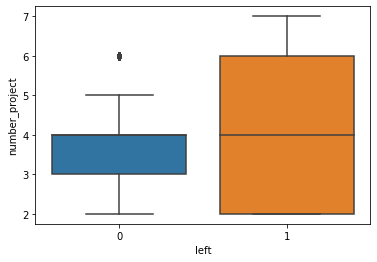

In [61]:
ddff11 = df.groupby(['number_project','left'])
ddff11 = ddff11.size().unstack().fillna(0)
ddff11[2] = ddff11[0] + ddff11[1]
ddff11[3] = ddff11[0] / ddff11[2]
ddff11[4] = ddff11[1] / ddff11[2]
ddff11[0] = ddff11[3]
ddff11[1] = ddff11[4]
del ddff11[4]
del ddff11[3]
del ddff11[2]
df_sel_satisfaction_level_group = ddff11.reset_index()
ddff11.plot(kind='barh', stacked=True)
plt.show()
sns.boxplot(x='left', y='number_project', data=df)
plt.show()

In [62]:
df['number_project'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

Выводы:
- В проекте 7 увольнение 100%. Возможно это был тестовый отдел или отдел для решения локаьлных задач. Количество сотрудников там  256, что значительно ниже среднего показателя в других отделах.
- Есть очевидные проблемы в проектах 6 и 2. Средние значения там достаточно высокие, но при этом уольнения составляют больше 40%.
- Боксплот работающих подтверждает, что в основном лояльынми преоктами к фирме являются проекты 3 и 4. Там увольнения наименее вероятны.

## average_montly_hours_group и left

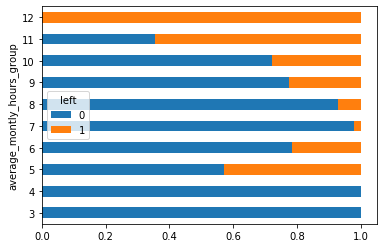

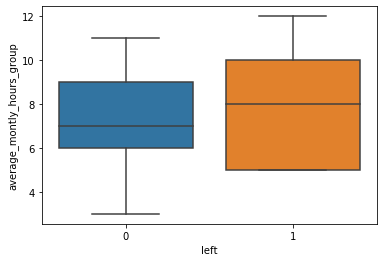

In [63]:
ddff11 = df.groupby(['average_montly_hours_group','left'])
ddff11 = ddff11.size().unstack().fillna(0)
ddff11[2] = ddff11[0] + ddff11[1]
ddff11[3] = ddff11[0] / ddff11[2]
ddff11[4] = ddff11[1] / ddff11[2]
ddff11[0] = ddff11[3]
ddff11[1] = ddff11[4]
del ddff11[4]
del ddff11[3]
del ddff11[2]
df_sel_satisfaction_level_group = ddff11.reset_index()
ddff11.plot(kind='barh', stacked=True)
plt.show()
sns.boxplot(x='left', y='average_montly_hours_group', data=df)
plt.show()

In [64]:
df['average_montly_hours_group'].value_counts()

6     2555
10    2511
5     2478
9     2295
7     1966
8     1936
11     621
4      413
12     170
3       54
Name: average_montly_hours_group, dtype: int64

Выводы:
- Количество отработанных часов в месяц связано с увольнениями. Простейшая связь - кто отрабатывает очень мало часов (до 50) - не увольняется. Те кто отрабатывает очень много (свыше 300) - увольняются.
- Не имеют проблем с увольнениями группы 6-9. То есть, если сотрудники имеют нормальную нагрузку - они не увольняются. Напрмер, 8 группа это 200 часов в месяц или 25 дней, что +/- соответсует классической 8-ми часовой рабочей неделе с 2 выходными.
- аномальныепоказатели демонстрирует группа 5. Нагрузка ниже средней, но примерно 45% сотрудников увольняются.

## time_spend_company и left

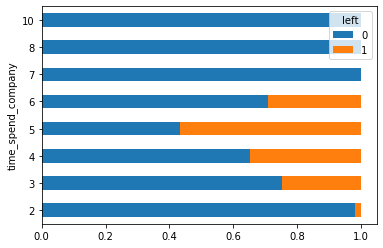

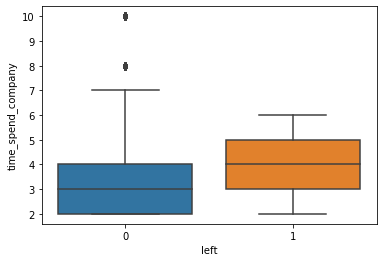

In [65]:
ddff11 = df.groupby(['time_spend_company','left'])
ddff11 = ddff11.size().unstack().fillna(0)
ddff11[2] = ddff11[0] + ddff11[1]
ddff11[3] = ddff11[0] / ddff11[2]
ddff11[4] = ddff11[1] / ddff11[2]
ddff11[0] = ddff11[3]
ddff11[1] = ddff11[4]
del ddff11[4]
del ddff11[3]
del ddff11[2]
df_sel_satisfaction_level_group = ddff11.reset_index()
ddff11.plot(kind='barh', stacked=True)
plt.show()
sns.boxplot(x='left', y='time_spend_company', data=df)
plt.show()

In [66]:
df['time_spend_company'].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

Выводы:
- Подавляющее бошинство сотрудинков в компании работают 2-5 лет.
- Те кто проходит рубеж работы в 6 лет не увольняются.
- Те, кто отработал 2 года практически не увольняются.
- Основная проблема с увольнениями прослеживается у сотрудников 3-6 лет работы, причем пик пробелмы приходится на год №5.

Причины аномалий данных:
- Отсутсвие увольнение в первые 2 года. Люди присматирваются, возможно ожидают опвышения или увеличения зарплаты и смотрят на общую нагрузку.
- Пик увольнений на год 5 может быть связан с тем, что люди не долждались повышения и увеличения зарплаты. Понимая, что здесь продвижения не будет - они уходят.

## Work_accident и left

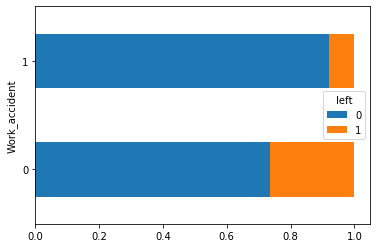

In [67]:
ddff11 = df.groupby(['Work_accident','left'])
ddff11 = ddff11.size().unstack().fillna(0)
ddff11[2] = ddff11[0] + ddff11[1]
ddff11[3] = ddff11[0] / ddff11[2]
ddff11[4] = ddff11[1] / ddff11[2]
ddff11[0] = ddff11[3]
ddff11[1] = ddff11[4]
del ddff11[4]
del ddff11[3]
del ddff11[2]
df_sel_satisfaction_level_group = ddff11.reset_index()
ddff11.plot(kind='barh', stacked=True)

Интересный вывод - люди, поулчившие травму на проиводстве, значительно реже покидают текущую компанию, чем те, кто травму не поучал. 

## promotion_last_5years и left

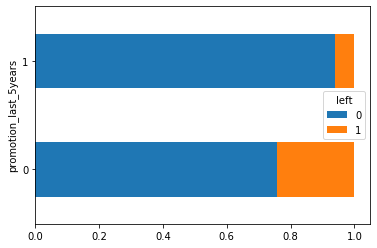

In [68]:
ddff11 = df.groupby(['promotion_last_5years','left'])
ddff11 = ddff11.size().unstack().fillna(0)
ddff11[2] = ddff11[0] + ddff11[1]
ddff11[3] = ddff11[0] / ddff11[2]
ddff11[4] = ddff11[1] / ddff11[2]
ddff11[0] = ddff11[3]
ddff11[1] = ddff11[4]
del ddff11[4]
del ddff11[3]
del ddff11[2]
df_sel_satisfaction_level_group = ddff11.reset_index()
ddff11.plot(kind='barh', stacked=True)

Вывод логичен - люди, которые получили повышение компанию покидают значительно реже, чем те, кто повышение не поулчил.

ИТОГ ТЕКУЩЕГО ПОДРАЗДЕЛА - КАЖДЫЙ СТОЛБЕЦ ДАТАФРЕЙМА ТАК ИЛИ ИНАЧЕ СОДЕРЖИТ ДАННЫЕ, СПОСОБНЫЕ ОКАЗАТЬ ВЛИЯНИЕ НА УВОЛЬНЕНИЕ СОТРУДНИКОВ.

## Дополнительная попарная проверка по рабочему времени

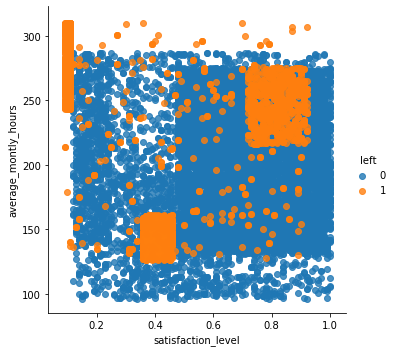

In [69]:
sns.lmplot(x='satisfaction_level', y='average_montly_hours', data=df, hue='left', fit_reg=False)

Есть 3 группы, в которых увольнения наиболее вероятны:
- satisfaction_level < 0.1
- 0.35 < satisfaction_level < 0.45 & 125 < average_montly_hours < 160
- 0.75 < satisfaction_level < 0.9 & 220 < average_montly_hours < 275

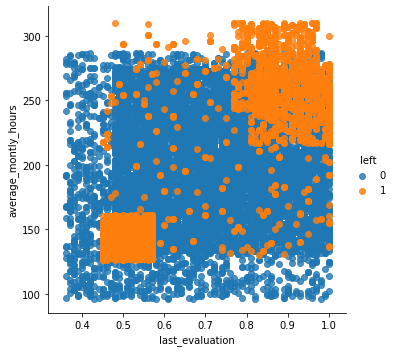

In [70]:
sns.lmplot(x='last_evaluation', y='average_montly_hours', data=df, hue='left', fit_reg=False)

Есть 2 квадрата, где увольнения очень вероятны:
- 0.45 < last_evaluation < 0.57 & 125 < average_montly_hours < 160
- 0.75 < last_evaluation < 1.0 & 220 < average_montly_hours

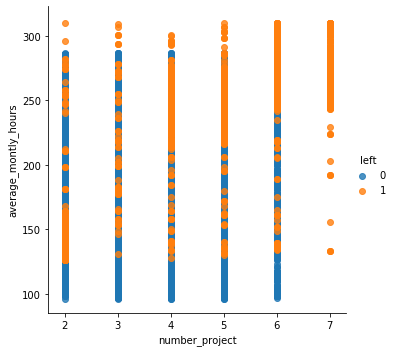

In [71]:
sns.lmplot(x='number_project', y='average_montly_hours', data=df, hue='left', fit_reg=False)

Закономерности:
- На проекте 2 оснвоная проблема при загрузке в месяц 125-170 часов.
- На проектах 4 и 5 графики очень похожи. Основная прбелма начинается при загрузке 210 часов в месяц и выше.
- На проекте 6 пробелма начинается при загрузке 240 часов в месяц и выше.

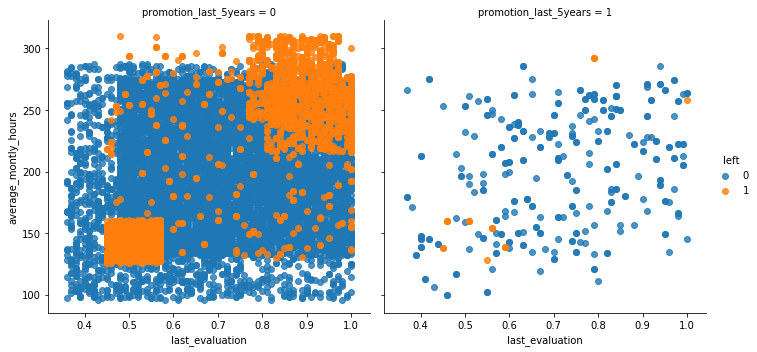

In [72]:
sns.lmplot(x='last_evaluation', y='average_montly_hours', data=df, col='promotion_last_5years', hue='left', fit_reg=False)

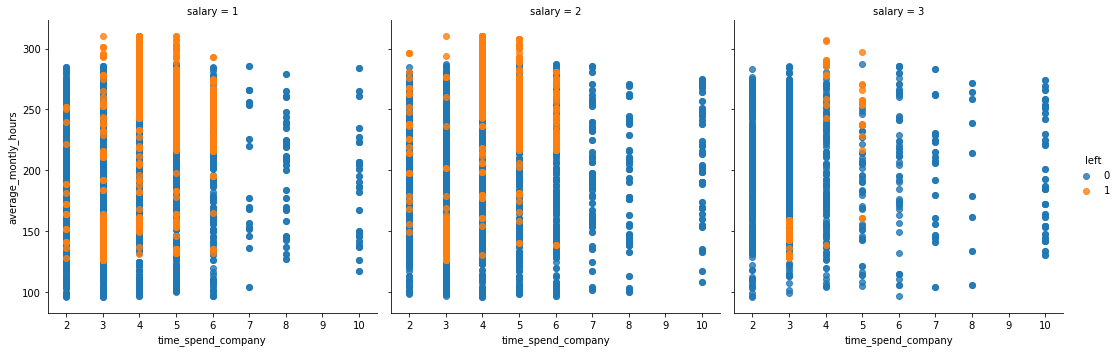

In [73]:
sns.lmplot(x='time_spend_company', y='average_montly_hours', data=df, col='salary', hue='left', fit_reg=False)

## Рассчитать сколько работников работает в каждом департаменте

In [74]:
df['sales'].value_counts()

1     4140
2     2720
3     2229
4     1227
5      902
6      858
7      787
8      767
9      739
10     630
Name: sales, dtype: int64

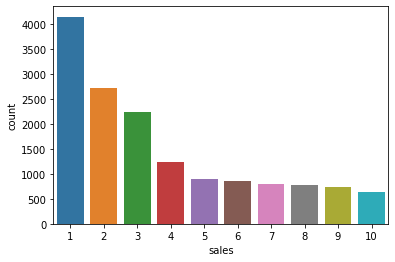

In [75]:
sns.countplot(x='sales', data=df);

## Показать распределение сотрудников по зарплатам

In [76]:
df['salary'].value_counts()

1    7316
2    6446
3    1237
Name: salary, dtype: int64

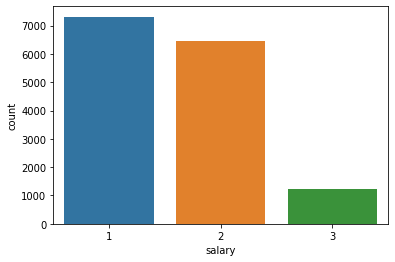

In [77]:
sns.countplot(x='salary', data=df);

## Показать распределение сотрудников по зарплатам совместно с департаментами

In [78]:
df_raschet = df[['salary','sales','left']]
df_raschet.groupby(['sales','salary']).count()

left
sales salary      
1     1       2099
      2       1772
      3        269
2     1       1372
      2       1147
      3        201
3     1       1146
      2        942
      3        141
4     1        609
      2        535
      3         83
5     1        451
      2        383
      3         68
6     1        402
      2        376
      3         80
7     1        364
      2        372
      3         51
8     1        358
      2        335
      3         74
9     1        335
      2        359
      3         45
10    1        180
      2        225
      3        225

## Сколько сотрудников покинули компанию

In [79]:
print('За все время компанию покинуло {} сотрудников'.format(df[df['left'] == 1]['left'].count()))
print('В первый год компанию покинуло {} сотрудников'.format(df[(df['left'] == 1) & (df['time_spend_company'] == 1)]['left'].count()))
print('Во второй год компанию покинуло {} сотрудников'.format(df[(df['left'] == 1) & (df['time_spend_company'] == 2)]['left'].count()))
print('В третий год компанию покинуло {} сотрудников'.format(df[(df['left'] == 1) & (df['time_spend_company'] == 3)]['left'].count()))
print('В четвертый год компанию покинуло {} сотрудников'.format(df[(df['left'] == 1) & (df['time_spend_company'] == 4)]['left'].count()))
print('В пятый год компанию покинуло {} сотрудников'.format(df[(df['left'] == 1) & (df['time_spend_company'] == 5)]['left'].count()))
print('В шестой компанию покинуло {} сотрудников'.format(df[(df['left'] == 1) & (df['time_spend_company'] == 6)]['left'].count()))

За все время компанию покинуло 3571 сотрудников
В первый год компанию покинуло 0 сотрудников
Во второй год компанию покинуло 53 сотрудников
В третий год компанию покинуло 1586 сотрудников
В четвертый год компанию покинуло 890 сотрудников
В пятый год компанию покинуло 833 сотрудников
В шестой компанию покинуло 209 сотрудников


## ГИПОТЕЗА - компанию в основном покидают сотрудники с низкими оценками.

Есть 2 уровня оценко сотрудников:
1. satisfaction_level или общая оценка за все время работы
2. last_evaluation - последняя оценка.

Изучим оба показателя в контексте увольнения сотрудников. По таблице корреляции видно, что оба показателя показывают наибольшую взаимосвязь с параметарми number_project, average_montly_hours, Work_accident. Рассмотрим все связи

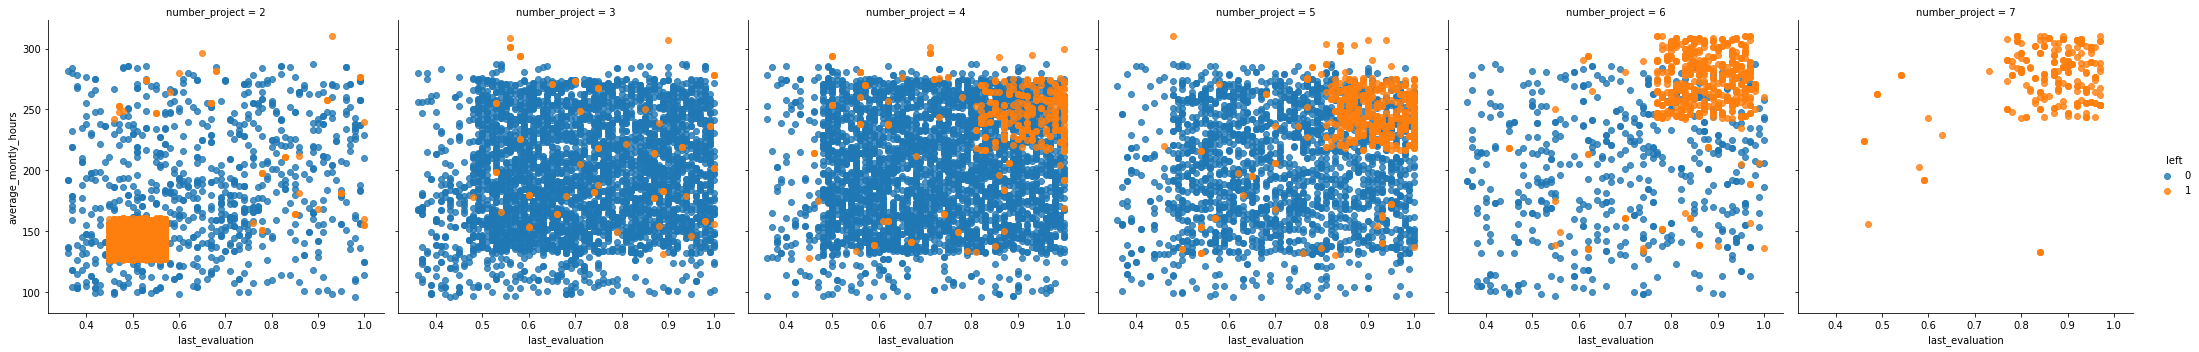

In [80]:
sns.lmplot(x='last_evaluation', y='average_montly_hours', data=df, col='number_project', hue='left', fit_reg=False)

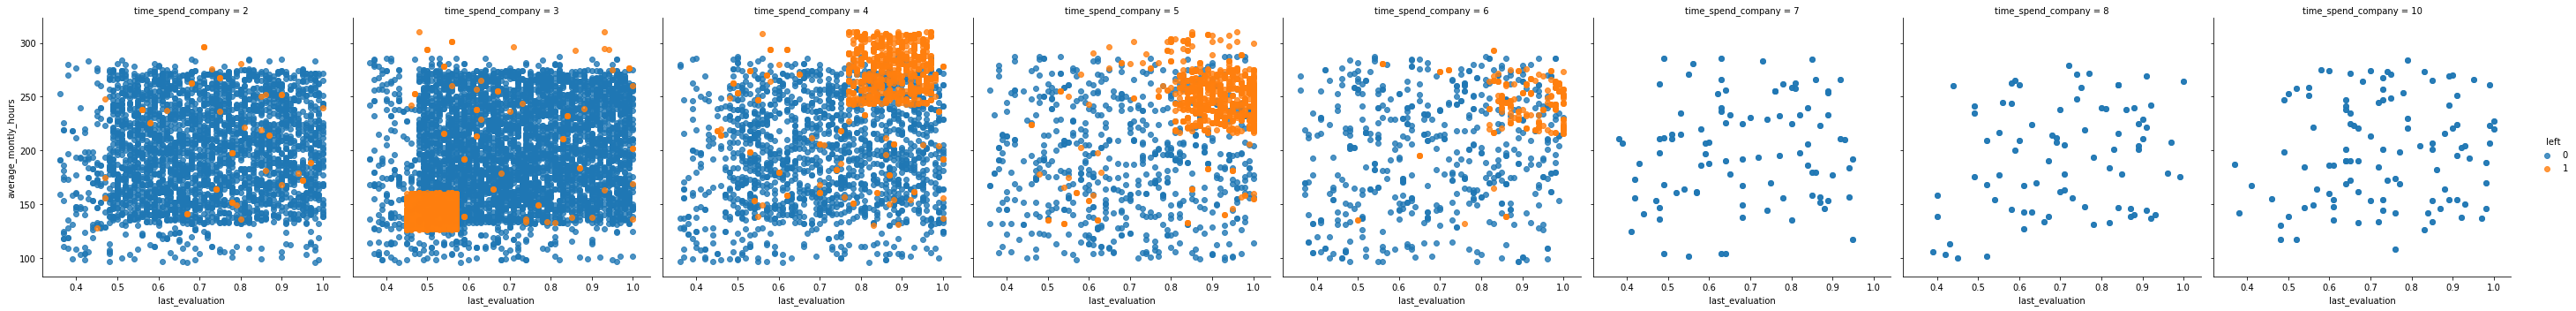

In [81]:
sns.lmplot(x='last_evaluation', y='average_montly_hours', data=df, col='time_spend_company', hue='left', fit_reg=False)

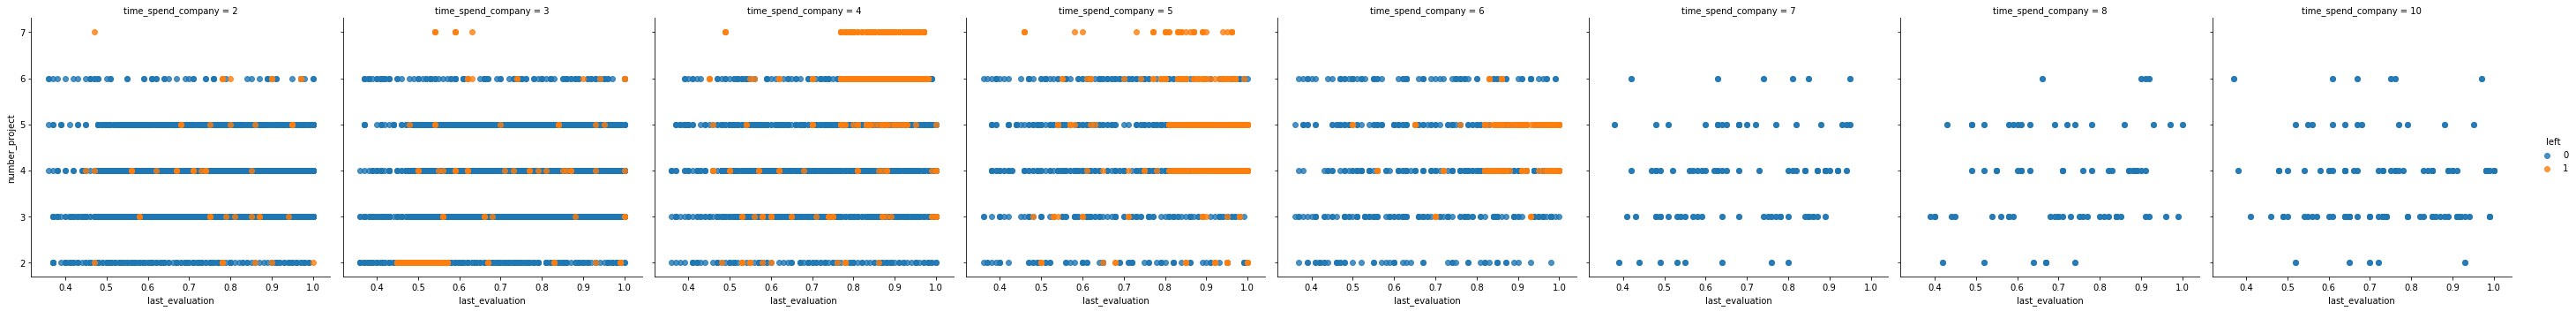

In [82]:
sns.lmplot(x='last_evaluation', y='number_project', data=df, col='time_spend_company', hue='left', fit_reg=False)

Выводы по анализу показателя "last_evaluation"
1. Рассматирваемая гипотеза в целом не верна.
2. Рассматирваемая гипотеза верна только для узкого сегмента сотрудников: те, кто работает на проекте №2 и для тех у кого время работы в компании 3 года. В этом лсучае оценка в диапазоне 0,44 - 0,58 совместно с нагрузкой 130-160 рабочих часов в месяц выделяют сотрудников, которые наиболее вероятно покинут компанию.
3. Для большинства сотрудников прослеживается обратная тенденция: чем выше последняя оценка (при условии высокой нагрузки), тем больше вероятность того, что сотрудник покинет компанию. Можно выделить нагрузку в 230 часов в месяц и выше. Если при этом последняя оценка выше 0,75, то сотрудник наиболее вероятно вероятно покинет компанию.
4. Исключение п.3 это проект №3, где однозначных тенденций не прослеживается.

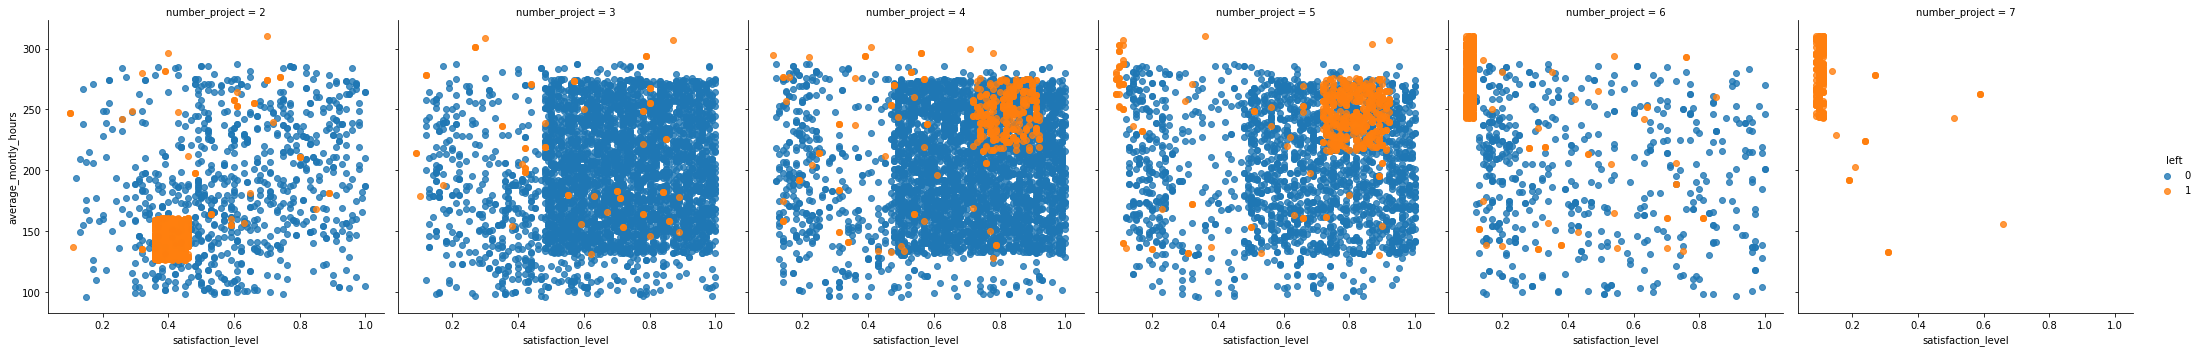

In [83]:
sns.lmplot(x='satisfaction_level', y='average_montly_hours', data=df, col='number_project', hue='left', fit_reg=False)

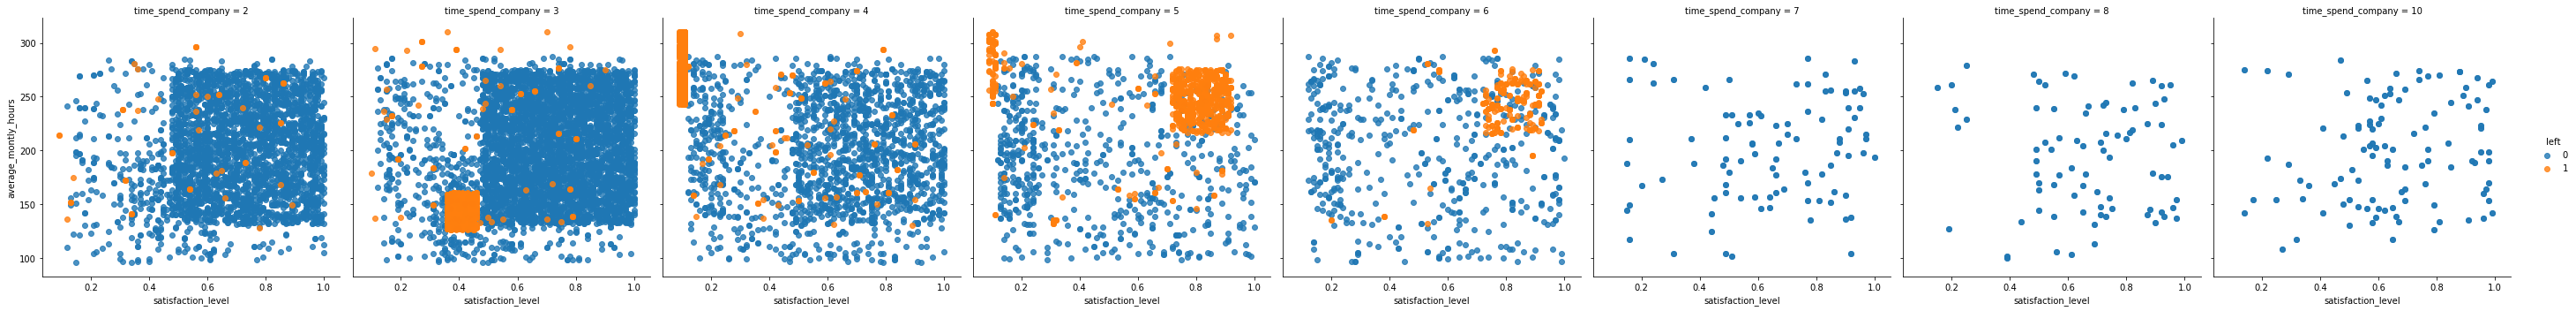

In [84]:
sns.lmplot(x='satisfaction_level', y='average_montly_hours', data=df, col='time_spend_company', hue='left', fit_reg=False)

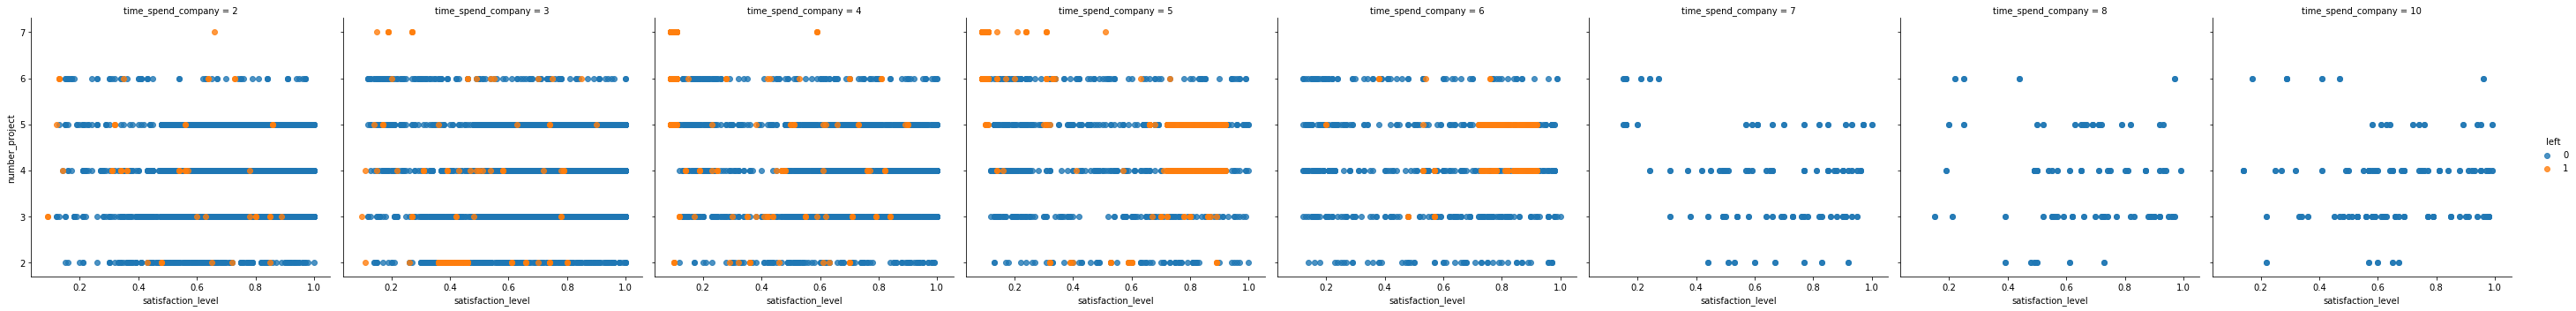

In [85]:
sns.lmplot(x='satisfaction_level', y='number_project', data=df, col='time_spend_company', hue='left', fit_reg=False)

Выводы по анализу показтеля "satisfaction_level"
1. Взаимосвязь между средней оценкой и увольнением очень сильно разница в зависимости от проекта, на котором работает сотрудник:
    
    1.1. На проекте №2 увольняются сотрудники со средней оценков районе 0,4, а также с нагрузкой 130-160 часов в месяц (этот же разброс был и в показателе "last_evaluation")
    
    1.2. На проекте №3 Вновь нет явной тенденции
    
    1.3. На проектах №4 и №5 в основном увольняются сотрудники со средней оценков 0,70-0,95 и нагрузкой больше 220 часов в месяц.
    
    1.4. На проектах №6 и№7 увольняются сотрудники со средней оценкой меньше 0,1. Формально здесь гипотеза срабатывает, но нужно сделать важное уточнение - все уволившиеся работали больше 240 часов в месяц, что является критической нагрузкой для сотрудников с любой оценкой.
2. Есть явная связь между средней оценкой и продолжительностью работы сотрудника в компании:
    
    2.1. Кто проработал 3 года увольняются по теже критериям, что указаыны в пункте 1.1.
    
    2.2.Кто проработал 4-5 лет увольняются по критериям, указанным в пункте 1.4.
    
    2.3. Кто проработал 5-6 лет увольняются по критериям, указанынм в пункте 1.3.

In [86]:
df[((df['number_project'] == 4) | (df['number_project']==5)) & (df['left']==1)]['time_spend_company'].value_counts()

5    691
6    197
4     74
3     33
2     26
Name: time_spend_company, dtype: int64

Одновременно возникает предположение, что существует связь между номером проекта и временем увольнения сотрудника из компании. Проверим это.

In [87]:
df[(df['number_project'] == 2) & (df['left']==1)]['time_spend_company'].value_counts()

3    1528
5      18
4      14
2       7
Name: time_spend_company, dtype: int64

Действительно, есть очень явная зависимость между оценками пользователя, временем работы, нагрузкой и номером проекта. Это тема для более глубокого анализа...

Выводы по текущей гипотезе:
1. В целом гипотеза не подтвердилась, поскольку лишь для некоторых сегментов прослеживается параллель, что компанию покидают сотрудники с низкой оценкой.
2. В большинстве случаев компанию покидают сотрудники с высокими оценками и высокой нагрузкой.

## ГИПОТЕЗА - сотрудники покидают компанию из-за невозможности поулчить повышение по службе и (или) увеличение зарплаты.

In [88]:
df['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

Повышение в компании получает примерно 2,1% сотрудников. Это крайне мало. Теоретически это подтверждает остальные цифры - люди ждут повышения, но не дождавшись его, уувольняются. Логично также, что пик этого процессса приходится на 4-5 годы работы. Проверим это предположение на цифрах, а также в связке с месячной нагрузкой (в предыдущей гипотезе мы выяснили, что этот показатель очень важен).

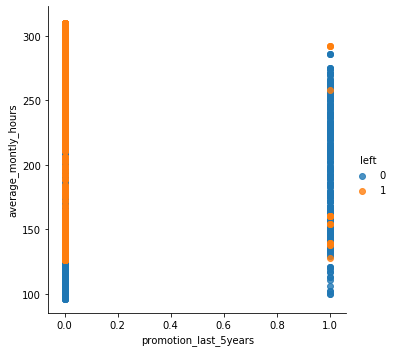

In [89]:
sns.lmplot(x='promotion_last_5years', y='average_montly_hours', data=df, hue='left', fit_reg=False)

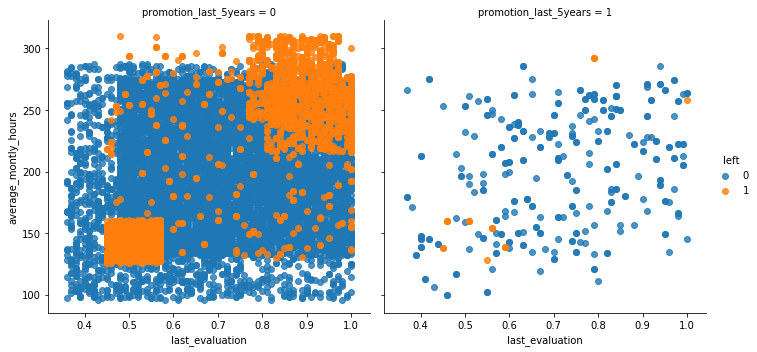

In [90]:
sns.lmplot(x='last_evaluation', y='average_montly_hours', data=df, col='promotion_last_5years', hue='left', fit_reg=False)

Есть 2 квадрата, которые хараткерны и для тех кто поулчил полвышение и для тех, кто его не поулчил:
1. Последняя оценка 0,42 - 0,58 и нагрузка 130 - 160 часов в месяц.
2. Последняя оценка выше 0,75 и нагрузка выше 210 часов в месяц.

Это 2 группы, для которых увольнения наиболее вероятны.

## Общие выводы по проекту:
1. У компании есть явные проблемы с распределением рабочего времени.
2. В компании  крайне мало повышают сотрудников по службе. Это один из ключевых факторов увольнений.
3. Компания должна рассмотреть вопрос увеличения процента сотрудников с повышением, либо задуматься о снижении месячной нагрузки.
3. Компания должна измбегать квадратов (обозначены в  гипотезах выше), в которых увольнение сотрудников аиболее вероятно.